In [14]:
import pandas
import numpy

from matplotlib import pyplot as plt

fn1 = "/gpfs/bbp.cscs.ch/project/proj82/home/reimann/layer_profiles"
fn2 = "/gpfs/bbp.cscs.ch/project/proj82/home/reimann/layer_profiles"

data1 = pandas.read_pickle(fn1)
data2 = pandas.read_pickle(fn2)

cols1 = data1.columns.levels[0].values
cols2 = data2.columns.levels[0].values
cols = numpy.intersect1d(cols1, cols2)
nx = int(numpy.sqrt(len(cols)))
ny = int(numpy.ceil(len(cols) / nx))


data1.columns = data1.columns.swaplevel(0, 1)
data2.columns = data2.columns.swaplevel(0, 1)

display(data1)

region,ACAd,ACAv,AId,AIp,AIv,AUDd,AUDp,AUDpo,AUDv,ECT,...,VISa,VISal,VISam,VISl,VISli,VISp,VISpl,VISpm,VISpor,VISrl
type,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,L2_IPC,...,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C,L6_TPC:C
0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2796.535856,3835.049702,1953.425813,4457.290139,5020.958086,3594.620278,5832.506855,4126.994196,4297.217398,4304.145620
20.890148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4208.789155,3198.721839,3652.181077,6815.500671,7016.283478,6204.620942,9580.738424,7811.940294,6742.092620,2009.951667
41.780297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6775.760287,5576.943689,7419.370184,9495.195159,9655.896293,8404.606876,11085.576470,11592.250068,10513.843893,2151.961472
62.670445,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8860.794047,9706.589297,10760.132285,11973.547134,12641.640745,10266.039005,12127.865396,14511.117529,13449.140261,4586.586830
83.560594,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10060.463483,12863.294038,12820.004734,13700.366021,14359.693604,11620.772920,12030.943737,15532.422818,14800.397440,7529.392269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4073.578953,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4094.469101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4115.359250,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


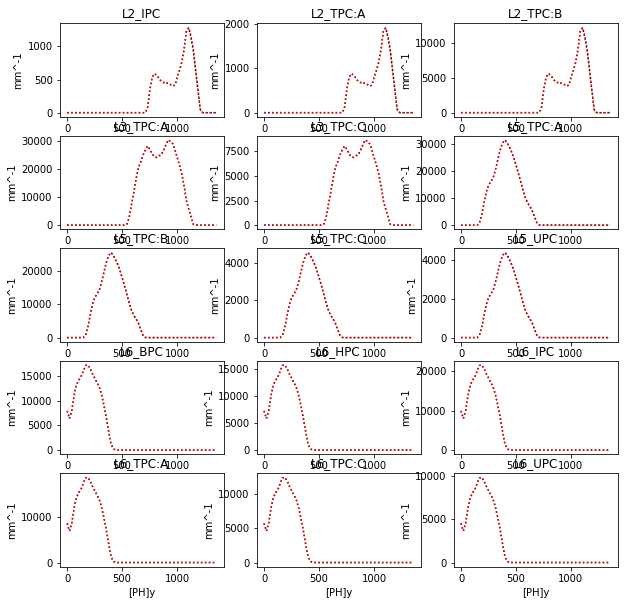

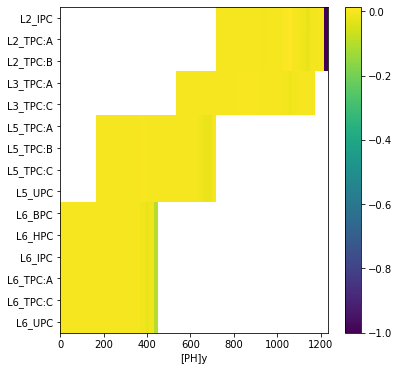

In [18]:
def compare_in_region(reg_name):
    sub1 = data1[reg_name]
    sub2 = data2[reg_name]
    fig1 = plt.figure(figsize=(10, 10))
    fig2 = plt.figure(figsize=(6, 6))
    ax2 = fig2.gca()
    diff_profiles = []; diff_labels = []
    for i, col in enumerate(cols):
        ax1 = fig1.add_subplot(ny, nx, i + 1)
        ax1.plot(sub1[col], color='black', ls=":")
        ax1.plot(sub2[col], color='red', ls=":")
        diff_profiles.append(((sub1[col] - sub2[col]) / (sub1[col] + sub2[col])).values)
        diff_labels.append(col)
        ax1.set_title(col)
        ax1.set_ylabel("mm^-1")
        ax1.set_xlabel("[PH]y")
    
    img = numpy.vstack(diff_profiles)
    valid = numpy.any(~numpy.isnan(img), axis=0)
    extent = (sub1.index[valid][0], sub1.index[valid][-1])
    img = ax2.imshow(img[:, valid],
                     aspect="auto",
                     extent=(extent[0], extent[1], len(diff_labels) - 0.5, -0.5))
    plt.colorbar(img)
    ax2.set_yticks(range(len(diff_labels)))
    ax2.set_yticklabels(diff_labels)
    ax2.set_xlabel("[PH]y")
    

compare_in_region("SSp-bfd")